In [15]:
import json
from pathlib import Path
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
complete_data = pd.read_json("data/complete_log_0807.json")
# MV must convert to seconds
complete_data["visible_points"] /= 14
complete_data["gripper_duration"] /= 14
complete_data["episode_duration"] /= 14


plot_data = complete_data[["uuid", "org", "day", "instruction", "visible_points", "gripper_closed_times", "gripper_duration", "episode_duration"]] # select columns

In [17]:
plot_data.head()

,uuid,org,day,instruction,visible_points,gripper_closed_times,gripper_duration,episode_duration
0,IRIS+ef107c48+2023-03-02-14h-58m-51s,IRIS,2023-03-02,Put the marker in the bowl,7.000000,1,2.785714,7.214286
1,IRIS+ef107c48+2023-03-02-15h-14m-31s,IRIS,2023-03-02,Place the marker inside the coffee cup,18.785714,2,8.142857,19.000000
2,IRIS+ef107c48+2023-03-02-16h-45m-35s,IRIS,2023-03-02,Put the marker in the cup,11.000000,1,5.357143,12.071429
3,IRIS+ef107c48+2023-03-02-16h-53m-07s,IRIS,2023-03-02,Place the marker inside the white cup,9.285714,1,5.000000,10.214286
4,IRIS+ef107c48+2023-03-03-15h-28m-29s,IRIS,2023-03-03,Put the marker in the mug,11.642857,2,5.785714,11.857143


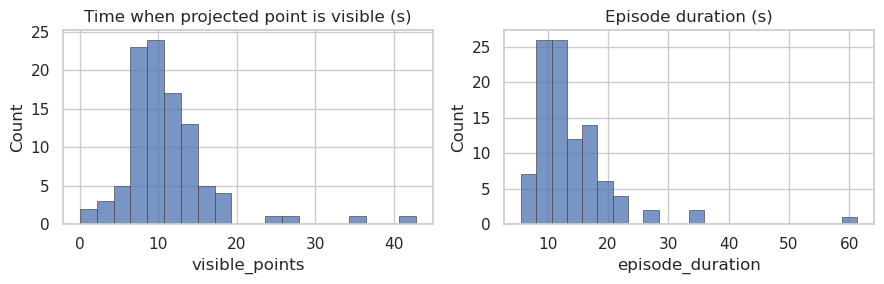

In [18]:
sns.set_theme(style="whitegrid")

### Matplotlib + seaborn
#f, (ax) = plt.subplots(1, 1, figsize=(13, 4))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))



# Draw a nested barplot by species and sex
# - Plot title
# - Axis title
# - Axis ticks
g = sns.histplot(
    data=plot_data,
    x="visible_points",
    edgecolor=".3",
    linewidth=.5,
    ax=ax1,
)
ax1.set_title("Time when projected point is visible (s)")

g = sns.histplot(
    data=plot_data,
    x="episode_duration",
    edgecolor=".3",
    linewidth=.5,
    ax=ax2,
)
ax2.set_title("Episode duration (s)")


f.tight_layout()
#f.savefig("plot.png",dpi=(100), bbox_inches='tight')

In [19]:
print(plot_data["gripper_closed_times"].value_counts())

gripper_closed_times
1    90
2     7
3     2
4     1
Name: count, dtype: int64


In [20]:
print((plot_data["visible_points"] / plot_data["episode_duration"] < 0.5).value_counts())

False    92
True      8
Name: count, dtype: int64


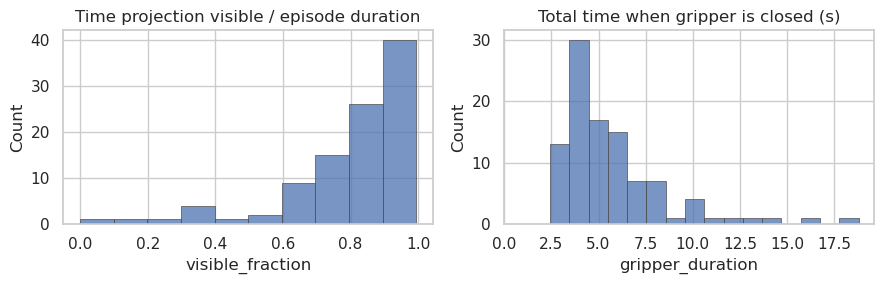

In [21]:
### Matplotlib + seaborn
#f, (ax) = plt.subplots(1, 1, figsize=(13, 4))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
# - Plot title
# - Axis title
# - Axis ticks
plot_data["visible_fraction"] = plot_data["visible_points"] / plot_data["episode_duration"]

g = sns.histplot(
    data=plot_data,
    x="visible_fraction",
    edgecolor=".3",
    linewidth=.5,
    ax=ax1,
)
ax1.set_title("Time projection visible / episode duration")

g = sns.histplot(
    data=plot_data,
    x="gripper_duration",
    edgecolor=".3",
    linewidth=.5,
    ax=ax2,
)
ax2.set_title("Total time when gripper is closed (s)")
ax2.set_xlim(left=0)

f.tight_layout()
#f.savefig("plot.png",dpi=(100), bbox_inches='tight')